# NumPy

The NumPy library provides support for arrays, matricies and mathematical functions to operate on them. We'll start with the basics and then cover a few more advanced topics.

## The N-dimensional array (ndarray) and array basics

The core of NumPy is the n-dimensional array (ndarray). Although it may seem similar to Python lists or the array.array class, there are some important differences. ndarrays ...

+ are homogenous, all elements must be of the same type (unlike list)
+ can be multidimensional (unlike array.array)
+ have much more functionality

We'll dive in with an example. The arange function is analogous to Python's range function, while reshape does exactly what you would expect and reshapes an array into a specified shape.

+ ndarray.ndim: number of dimensions or rank
+ ndarray.shape: tuple containing the dimensions of the array
+ ndarray.dtype: data type of elements
+ ndarray.size: total number of elements (product of dimensions)

In [1]:
import numpy as np

In [2]:
a = np.arange(20).reshape(5,4)

In [3]:
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [4]:
a.ndim

2

In [5]:
a.shape

(5, 4)

In [6]:
a.dtype

dtype('int64')

In [7]:
a.size

20

In [8]:
type(a)

numpy.ndarray

## Arrays creation

Arrays can be created from lists or tuples using the array method

In [9]:
np.array([1,2,3])

array([1, 2, 3])

In [10]:
np.array([[1,2,3], [4,5,6], [7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

NumPy provides functions for creating arrays of arbitrary dimensions containing all zeros or ones. Note that the argument is a tuple of dimensions.

In [11]:
np.zeros( (3,4) )

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [12]:
np.ones ( (5,3) )

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

The zeros_like and ones_like functions create arrays filled with zeros or ones, respectively, of the same shape as the argument.

In [13]:
a = np.arange(20).reshape(5,4)
np.zeros_like(a)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [14]:
a = np.arange(12).reshape(6,2)
np.ones_like(a)

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

### Printing arrays

As we've seen, arrays can be printed using the built-in print function. To avoid cluttering you screen, only the top and bottom of very large arrays are displayed.

In [15]:
a = np.arange(10000).reshape(2000,5)
print(a)

[[   0    1    2    3    4]
 [   5    6    7    8    9]
 [  10   11   12   13   14]
 ..., 
 [9985 9986 9987 9988 9989]
 [9990 9991 9992 9993 9994]
 [9995 9996 9997 9998 9999]]


## Array math

Basic math operations are performed elementwise on conforming arrays (arrays of the same shape). Scalar arguments are applied to each element

Universal functions (ufunc) are applied to each element. Note in the examples below that we did not need to use the map function since the NumPy ufuncs are designed to operate on ndarray arguments

In [16]:
a = np.arange(9).reshape(3,3)
b = np.arange(9,18).reshape(3,3)
print(a)
print()
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]

[[ 9 10 11]
 [12 13 14]
 [15 16 17]]


In [17]:
a+b + 100

array([[109, 111, 113],
       [115, 117, 119],
       [121, 123, 125]])

Note that the "\*" operator does an elementwise multiplication and is not the linear algebra matrix multiply

In [18]:
a*b

array([[  0,  10,  22],
       [ 36,  52,  70],
       [ 90, 112, 136]])

In [19]:
np.sin(a) + np.log(b)

array([[ 2.19722458,  3.14405608,  3.3071927 ],
       [ 2.62602666,  1.80814686,  1.68013305],
       [ 2.4286347 ,  3.42957532,  3.82257159]])

## Sum, min, max, argmin, argmax, cumsum

The ndarray class has methods for finding the min and max values in an array, their locations (argmin and argmax), the sum and the cumulative sum. When applied to multidimensional arrays, the array is first flattened into a 1d array.

In [20]:
np.random.seed(123)
a = np.random.rand(6)
print(a)

[ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897  0.42310646]


In [21]:
print("Min :", a.min())
print("Max :", a.max())
print("Sum :", a.sum())
print("Argmin :", a.argmin())
print("Argmax :", a.argmax())

print("\nCumlative sum :\n", a.cumsum())

Min : 0.226851453564
Max : 0.719468969786
Sum : 2.90335017311
Argmin : 2
Argmax : 4

Cumlative sum :
 [ 0.69646919  0.98260852  1.20945997  1.76077474  2.48024371  2.90335017]


For multidimensional arrays, many of these functions can take an argument specifying the axis along which the operations should be applied. The result is an array of dimension one lower than the array.

In [22]:
np.random.seed(123)
a = np.random.rand(16).reshape(4,4)
print(a)

[[ 0.69646919  0.28613933  0.22685145  0.55131477]
 [ 0.71946897  0.42310646  0.9807642   0.68482974]
 [ 0.4809319   0.39211752  0.34317802  0.72904971]
 [ 0.43857224  0.0596779   0.39804426  0.73799541]]


In [23]:
print("Min :", a.min(axis=0))
print("Max :", a.max(axis=0))
print("Sum :", a.sum(axis=0))
print("Argmin :", a.argmin(axis=0))
print("Argmax :", a.argmax(axis=0))

Min : [ 0.43857224  0.0596779   0.22685145  0.55131477]
Max : [ 0.71946897  0.42310646  0.9807642   0.73799541]
Sum : [ 2.3354423   1.16104121  1.94883792  2.70318962]
Argmin : [3 3 0 0]
Argmax : [1 1 1 3]


## Stacking and splitting arrays

NumPy provides methods for stacking arrays (hstack, vstack) and splitting arrays (hsplit, vsplit). The stacking methods take as input a tuple containing an arbitrary number of arrays.

In [24]:
a = np.arange(16).reshape(4,4)
b = np.arange(16,32).reshape(4,4)
print(a)
print()
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [25]:
np.vstack( (a,b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [26]:
c = np.hstack( (a,b,a,b) )
print(c)

[[ 0  1  2  3 16 17 18 19  0  1  2  3 16 17 18 19]
 [ 4  5  6  7 20 21 22 23  4  5  6  7 20 21 22 23]
 [ 8  9 10 11 24 25 26 27  8  9 10 11 24 25 26 27]
 [12 13 14 15 28 29 30 31 12 13 14 15 28 29 30 31]]


In [27]:
(d, e) = np.hsplit(c,(3,))
print(d)
print()
print(e)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]

[[ 3 16 17 18 19  0  1  2  3 16 17 18 19]
 [ 7 20 21 22 23  4  5  6  7 20 21 22 23]
 [11 24 25 26 27  8  9 10 11 24 25 26 27]
 [15 28 29 30 31 12 13 14 15 28 29 30 31]]


## Copies

Be aware that ndarrays behave the same way as other Python objects when doing a simple assignment

In [28]:
a = np.arange(4)
b = a

In [29]:
print(a)
b[0] = 7
print(a)

[0 1 2 3]
[7 1 2 3]


If you really want to copy an array, use the copy method

In [30]:
a = np.arange(4)
b = a.copy()

In [31]:
print(a)
b[0] = 7
print(a)

[0 1 2 3]
[0 1 2 3]


## Histograms

Although most plotting packages have the capabilities to directly generate a histogram from a data set, sometimes you just want the result and not the plot. This can be done using the NumPy histogram method. In its simplest form, the method just takes an array and the number of bins

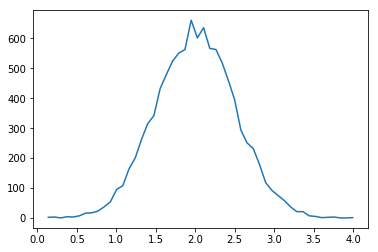

In [32]:
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
(hist, bin_edges) = np.histogram(v, bins=50)

import matplotlib.pyplot as plt
plt.plot(.5*(bin_edges[1:]+bin_edges[:-1]), hist)
plt.show()

## Linear algebra

NumPy provides a comprehensive set of linear algebra capabilities. We demonstrate a few of these below. A convenient summary of of these capabilities can be found here https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

In this first example, we calculate the inverse of a matrix and then confirm that the product of the matrix and its inverse is equal to the identity matrix

In [33]:
A = np.random.rand(4,4)      # Populate matrix with randon values
Ainv = np.linalg.inv(A)      # Calculate the inverse
I = np.eye(4)                # Identity matrix used for testing 
AxAinv = np.matmul(A, Ainv)  # Matrix multiplication
np.all(AxAinv == I)          # Test if all elements of A x Ainv are true

False

What happened? Wouldn't we expect the matrix multipied by its inverse to be equal to the identity matrix? Let's take a look at the content of the arrays.

In [34]:
print("Matrix A")
print(A, "\n")
print("Inverse of matrix A")
print(Ainv, "\n")
print("Product A x Ainv")
print(AxAinv, "\n")
print("Identity matrix")
print(I)

Matrix A
[[ 0.90553761  0.3491035   0.01878307  0.21474258]
 [ 0.42990531  0.43566402  0.54816385  0.8233592 ]
 [ 0.33177785  0.78546986  0.46148833  0.20164153]
 [ 0.36477242  0.63998744  0.69290713  0.47342497]] 

Inverse of matrix A
[[ 1.42991476 -1.02893323 -1.5228803   1.78949998]
 [-0.52207461  1.11761668  3.48566067 -3.19151373]
 [ 0.09321778 -2.35441611 -3.12018731  5.38136317]
 [-0.53242551  2.72790331  1.02809474 -2.82836043]] 

Product A x Ainv
[[  1.00000000e+00   0.00000000e+00   5.55111512e-17   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00  -3.33066907e-16   4.44089210e-16]
 [ -1.66533454e-16   2.22044605e-16   1.00000000e+00  -1.11022302e-16]
 [ -1.11022302e-16   0.00000000e+00   0.00000000e+00   1.00000000e+00]] 

Identity matrix
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


We forgot to take into account the fact that floating point math involves rounding errors. Fortunately, these floating point comparisons are so common that numpy provides a function for testing whether results agree to within a tolerance.

In [35]:
np.allclose(AxAinv, I)

True

As a second example, we'll solve the eigenvalue problem Hx = λx and confirm that the sum over the eigenvalues is equal to the trace of the matrix. Don't worry if you're unfamiliar with eigenvalue problems. These come up in many scientific and engineering problems and are used in the machine learning technique principal component analysis (PCA).

In [36]:
eigvals = np.linalg.eigvals(A)
eigvals_sum = eigvals.sum()
trace = np.trace(A)
np.allclose(eigvals_sum, trace)

True

## Random sampling

Numpy contains an extensive set of functions for generating samplings from random distributions. For the full set of functions, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

The random.rand() function returns an array of floating point values between 0 ≤ x < 1, with the argument specifying the dimensions of the array. We saw this earlier, in the discussion of linear algeba funcions, but without explanation.

In [37]:
np.random.rand(10)

array([ 0.10907356,  0.28531668,  0.93306458,  0.66983283,  0.53323553,
        0.61277927,  0.86410959,  0.98047986,  0.26844615,  0.8989367 ])

In [38]:
np.random.rand(4,4)

array([[ 0.2697794 ,  0.07437439,  0.64219329,  0.7948267 ],
       [ 0.7027967 ,  0.34430167,  0.04163668,  0.22708323],
       [ 0.36225732,  0.99812157,  0.56178248,  0.58425461],
       [ 0.21611783,  0.81738305,  0.005409  ,  0.65411136]])

In [39]:
np.random.rand(3,3,3)

array([[[ 0.38373161,  0.64473773,  0.26193407],
        [ 0.87365637,  0.53666328,  0.29251293],
        [ 0.51022266,  0.79682803,  0.88425962]],

       [[ 0.84423737,  0.85855229,  0.85831302],
        [ 0.18222367,  0.64214835,  0.25397529],
        [ 0.46093213,  0.93434437,  0.7036276 ]],

       [[ 0.40167112,  0.15803781,  0.69315088],
        [ 0.61848046,  0.64817606,  0.3902677 ],
        [ 0.0442045 ,  0.81781409,  0.77493736]]])

random.randimt(low, [,high ,size]) generates random integers between low (inclusive) and high (exclusive), with size setting the number of random integers returned

In [40]:
np.random.randint(1,7,100)

array([2, 2, 3, 6, 2, 5, 3, 3, 4, 6, 1, 6, 5, 6, 4, 2, 6, 2, 6, 3, 6, 1, 3,
       5, 6, 5, 6, 5, 5, 2, 4, 2, 1, 5, 1, 1, 6, 5, 3, 6, 4, 2, 3, 1, 5, 5,
       6, 4, 3, 6, 6, 4, 6, 1, 6, 4, 6, 2, 6, 6, 4, 4, 5, 5, 6, 4, 6, 2, 1,
       4, 6, 5, 6, 1, 4, 4, 1, 3, 6, 3, 5, 1, 5, 4, 4, 1, 6, 3, 3, 3, 4, 6,
       5, 2, 4, 2, 1, 5, 3, 6])

random.randn() samples a normal distribution with mean 0 and standard deviation 1

In [41]:
np.random.randn(5,5)

array([[ 0.63116972, -1.73836663, -0.44176693,  0.59618155, -1.70313142],
       [ 0.33847276,  1.05857895,  0.68398476, -0.91119956, -0.69131798],
       [ 0.73665637,  0.33307578,  1.24909313, -1.37381538, -1.3639383 ],
       [-0.65155781, -0.99280722, -0.37658655, -0.00511713, -1.49188858],
       [-0.35612259,  0.19870999, -0.72351776, -0.21422377,  0.40551945]])

To convert to a normal distribution with a different mean ($\mu$) and standard deviation ($\sigma$), multiply results by sigma and add mu

In [42]:
sigma, mu = 0.5, 5
np.random.randn(25)*sigma + mu

array([ 5.14938549,  5.38897374,  5.51315471,  5.16802521,  4.81803226,
        5.07241934,  5.2719953 ,  5.53741929,  6.02608204,  5.13784721,
        5.01754471,  4.48931958,  4.02599793,  5.96125335,  5.91920031,
        5.74117287,  5.19562785,  5.54516599,  5.40298004,  4.94522871,
        4.61516916,  4.88477814,  5.0694626 ,  4.10695006,  5.38603891])

random.binomial(n,p [,size]) samples a binomial distribution with n trials, probability p. A third optional argument (size) specifies the number of samples to be generated

In [43]:
# This will return the number of heads from six (n) flips of a fair coin (p)
n, p = 6, 0.5
np.random.binomial(n, p, 100)

array([6, 3, 2, 3, 3, 5, 1, 1, 0, 2, 3, 4, 3, 3, 3, 5, 4, 2, 1, 1, 2, 3, 4,
       1, 4, 3, 2, 5, 3, 1, 4, 4, 4, 3, 2, 2, 2, 3, 3, 2, 5, 2, 1, 4, 2, 2,
       2, 3, 4, 3, 1, 3, 4, 1, 2, 5, 5, 4, 4, 2, 1, 2, 3, 3, 4, 5, 1, 2, 5,
       1, 2, 4, 4, 3, 2, 2, 5, 1, 6, 4, 1, 4, 2, 2, 4, 3, 4, 2, 3, 5, 4, 4,
       3, 4, 3, 3, 1, 3, 5, 2])

Many machine learning applications require that we either permute the data or draw a subsample of the data. This can be done with random.permutation() and random.choice() functions.

In [44]:
# Generate permutations of a list
x = np.array(['a', 'b', 'c', 'd', 'e'])
for i in range(10):
    print(np.random.permutation(x))

['c' 'a' 'b' 'd' 'e']
['a' 'd' 'e' 'b' 'c']
['b' 'e' 'd' 'a' 'c']
['a' 'c' 'e' 'd' 'b']
['a' 'c' 'e' 'd' 'b']
['a' 'd' 'e' 'b' 'c']
['e' 'd' 'b' 'c' 'a']
['d' 'e' 'c' 'b' 'a']
['d' 'a' 'e' 'b' 'c']
['a' 'b' 'e' 'c' 'd']


In [45]:
# Random select 4 elemnts from a list with replacement allowed
y = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'g'])
for i in range(10):
    print(np.random.choice(x, 4))

['b' 'e' 'd' 'c']
['b' 'a' 'a' 'd']
['d' 'd' 'b' 'c']
['e' 'd' 'b' 'c']
['e' 'd' 'e' 'e']
['b' 'b' 'c' 'c']
['e' 'b' 'e' 'd']
['b' 'c' 'a' 'd']
['e' 'c' 'e' 'c']
['b' 'e' 'e' 'e']


In [46]:
# Random select 4 elemnts from a list without replacement
y = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'g'])
for i in range(10):
    print(np.random.choice(x, 4, replace=False))

['d' 'e' 'c' 'a']
['d' 'a' 'c' 'b']
['d' 'b' 'e' 'c']
['c' 'b' 'd' 'e']
['a' 'c' 'e' 'd']
['a' 'e' 'd' 'b']
['e' 'b' 'c' 'd']
['d' 'e' 'a' 'b']
['d' 'b' 'e' 'c']
['b' 'a' 'c' 'e']


An especially useful feature of np.random.choice is the ability to choose elements from an uneven probability distribution. This might arise, for example, in bioinformatics applications where we want to select amino acids with the probabilities that they appear in an organism.

In [49]:
from collections import Counter

x = ['A', 'B', 'C']
probs = [0.1, 0.2, 0.7]
sampling = np.random.choice(x, size=10000, p=probs)
Counter(sampling)

Counter({'A': 1009, 'B': 1999, 'C': 6992})